<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://tpq.io' target='_blank'>http://tpq.io</a>

**Contact us** | <a href='mailto:pff@tpq.io'>pff@tpq.io</a>

# Statistics (a)

In [1]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
# import warnings; warnings.simplefilter('ignore')

## Normality Tests

### Benchmark Case

In [2]:
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

/Users/yves/miniconda3/envs/py4fi/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
def gen_paths(S0, r, sigma, T, M, I):
    ''' Generate Monte Carlo paths for geometric Brownian motion.
    
    Parameters
    ==========
    S0 : float
        initial stock/index value
    r : float
        constant short rate
    sigma : float
        constant volatility
    T : float
        final time horizon
    M : int
        number of time steps/intervals
    I : int
        number of paths to be simulated
        
    Returns
    =======
    paths : ndarray, shape (M + 1, I)
        simulated paths given the parameters
    '''
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * np.sqrt(dt) * rand)
    return paths

In [4]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000

In [5]:
paths = gen_paths(S0, r, sigma, T, M, I)

Text(0,0.5,'index level')

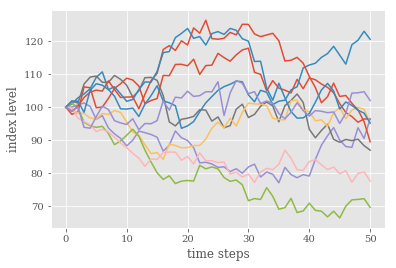

In [6]:
plt.plot(paths[:, :10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')
# tag: normal_sim_1
# title: 10 simulated paths of geometric Brownian motion

In [7]:
log_returns = np.log(paths[1:] / paths[0:-1]) 

In [8]:
paths[:, 0].round(4)

array([ 100.    ,   97.821 ,   98.5573,  106.1546,  105.899 ,   99.8363,
        100.0145,  102.6589,  105.6643,  107.1107,  108.7943,  108.2449,
        106.4105,  101.0575,  102.0197,  102.6052,  109.6419,  109.5725,
        112.9766,  113.0225,  112.5476,  114.5585,  109.942 ,  112.6271,
        112.7502,  116.3453,  115.0443,  113.9586,  115.8831,  117.3705,
        117.9185,  110.5539,  109.9687,  104.9957,  108.0679,  105.7822,
        105.1585,  104.3304,  108.4387,  105.5963,  108.866 ,  108.3284,
        107.0077,  106.0034,  104.3964,  101.0637,   98.3776,   97.135 ,
         95.4254,   96.4271,   96.3386])

In [9]:
log_returns[:, 0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [10]:
def print_statistics(array):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    sta = scs.describe(array)
    print("%14s %15s" % ('statistic', 'value'))
    print(30 * "-")
    print("%14s %15.5f" % ('size', sta[0]))
    print("%14s %15.5f" % ('min', sta[1][0]))
    print("%14s %15.5f" % ('max', sta[1][1]))
    print("%14s %15.5f" % ('mean', sta[2]))
    print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('skew', sta[4]))
    print("%14s %15.5f" % ('kurtosis', sta[5]))

In [11]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


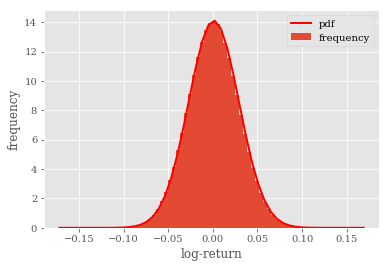

In [12]:
plt.hist(log_returns.flatten(), bins=70, normed=True, label='frequency')
plt.grid(True)
plt.xlabel('log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)),
         'r', lw=2.0, label='pdf')
plt.legend()
# tag: normal_sim_2
# title: Histogram of log-returns and normal density function

Text(0,0.5,'sample quantiles')

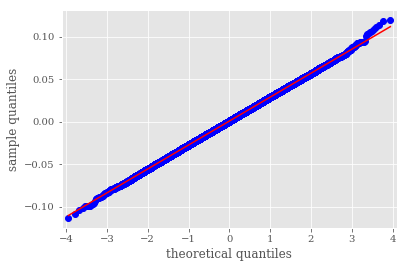

In [13]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
# tag: sim_val_qq_1
# title: Quantile-quantile plot for log returns

In [14]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    print("Skew of data set  %14.3f" % scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set  %14.3f" % scs.kurtosis(arr))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(arr)[1])

In [15]:
normality_tests(log_returns.flatten())

Skew of data set           0.001
Skew test p-value          0.430
Kurt of data set           0.001
Kurt test p-value          0.541
Norm test p-value          0.607


Text(0.5,1,'log data')

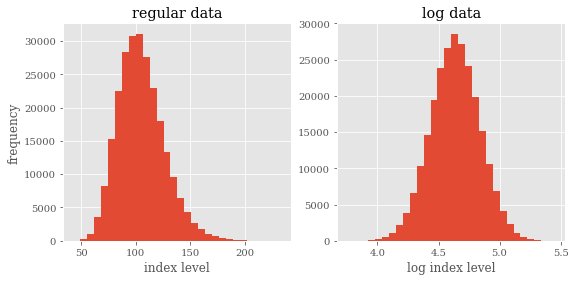

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.hist(paths[-1], bins=30)
ax1.grid(True)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')
# tag: normal_sim_3
# title: Histogram of simulated end-of-period index levels
# size: 90

In [17]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std        21.23174
          skew         0.61116
      kurtosis         0.65182


In [18]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.75534
           max         5.45354
          mean         4.63517
           std         0.19998
          skew        -0.00092
      kurtosis        -0.00327


In [19]:
normality_tests(np.log(paths[-1]))

Skew of data set          -0.001
Skew test p-value          0.851
Kurt of data set          -0.003
Kurt test p-value          0.744
Norm test p-value          0.931


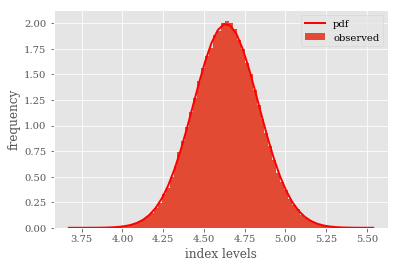

In [20]:
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, normed=True, label='observed')
plt.grid(True)
plt.xlabel('index levels')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()),
         'r', lw=2.0, label='pdf')
plt.legend()
# tag: normal_sim_4
# title: Histogram of log index levels and normal density function

Text(0,0.5,'sample quantiles')

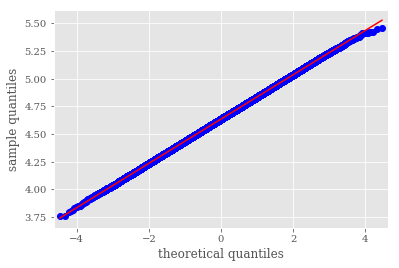

In [21]:
sm.qqplot(log_data, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
# tag: sim_val_qq_2
# title: Quantile-quantile plot for log index levels

### Real World Data

In [22]:
import pandas as pd

In [23]:
raw = pd.read_csv('source/tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)

In [24]:
symbols = ['SPY', 'GLD', 'AAPL.O', 'MSFT.O']

In [25]:
data = raw[symbols]
data = data.dropna()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 4 columns):
SPY       1972 non-null float64
GLD       1972 non-null float64
AAPL.O    1972 non-null float64
MSFT.O    1972 non-null float64
dtypes: float64(4)
memory usage: 77.0 KB


In [27]:
data.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,113.33,109.80,30.572827,30.950
2010-01-05,113.63,109.70,30.625684,30.960
2010-01-06,113.71,111.51,30.138541,30.770
2010-01-07,114.19,110.82,30.082827,30.452
2010-01-08,114.57,111.37,30.282827,30.660


/Users/yves/miniconda3/envs/py4fi/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


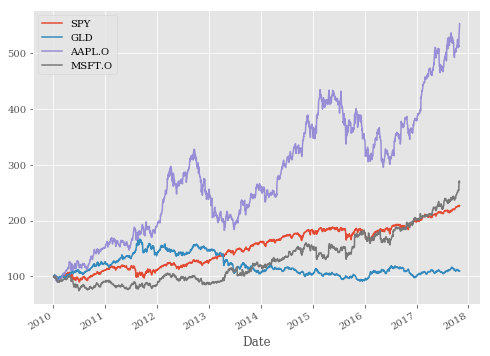

In [28]:
(data / data.ix[0] * 100).plot(figsize=(8, 6), grid=True)
# tag: real_returns_1
# title: Evolution of stock and index levels over time

In [29]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.002644,-0.000911,0.001727,0.000323
2010-01-06,0.000704,0.016365,-0.016034,-0.006156
2010-01-07,0.004212,-0.006207,-0.001850,-0.010389
2010-01-08,0.003322,0.004951,0.006626,0.006807


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1ff604a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c200fae48>]], dtype=object)

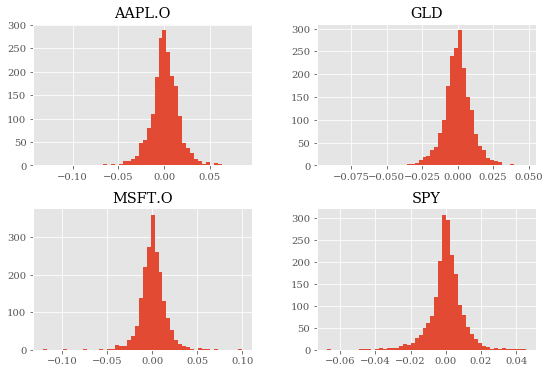

In [30]:
log_returns.hist(bins=50, figsize=(9, 6))
# tag: real_returns_2
# title: Histogram of respective log-returns
# size: 90

In [31]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(30 * "-")
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol SPY
------------------------------
     statistic           value
------------------------------
          size      1971.00000
           min        -0.06734
           max         0.04545
          mean         0.00042
           std         0.00934
          skew        -0.46886
      kurtosis         4.54265

Results for symbol GLD
------------------------------
     statistic           value
------------------------------
          size      1971.00000
           min        -0.09191
           max         0.04795
          mean         0.00005
           std         0.01048
          skew        -0.60078
      kurtosis         5.42113

Results for symbol AAPL.O
------------------------------
     statistic           value
------------------------------
          size      1971.00000
           min        -0.13187
           max         0.08502
          mean         0.00087
           std         0.01605
          skew        -0.26179
      kurtosis         4.9

Text(0,0.5,'sample quantiles')

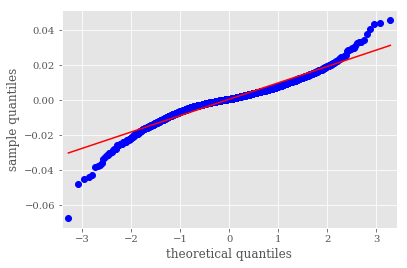

In [32]:
sm.qqplot(log_returns['SPY'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
# tag: real_val_qq_1
# title: Quantile-quantile plot for S&P 500 log returns

Text(0,0.5,'sample quantiles')

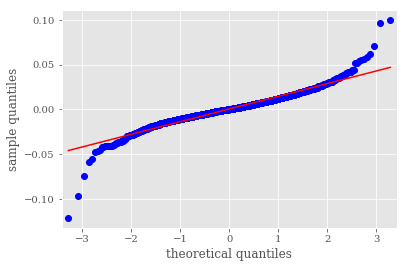

In [33]:
sm.qqplot(log_returns['MSFT.O'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
# tag: real_val_qq_2
# title: Quantile-quantile plot for Microsoft log returns

In [34]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(32 * "-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol SPY
--------------------------------
Skew of data set          -0.469
Skew test p-value          0.000
Kurt of data set           4.543
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol GLD
--------------------------------
Skew of data set          -0.601
Skew test p-value          0.000
Kurt of data set           5.421
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol AAPL.O
--------------------------------
Skew of data set          -0.262
Skew test p-value          0.000
Kurt of data set           4.922
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT.O
--------------------------------
Skew of data set          -0.101
Skew test p-value          0.067
Kurt of data set           7.701
Kurt test p-value          0.000
Norm test p-value          0.000


## Portfolio Optimization

### The Data

In [35]:
symbols = ['AAPL.O', 'MSFT.O', 'AMZN.O', 'GDX', 'GLD']
noa = len(symbols)

In [36]:
data = raw[symbols]

/Users/yves/miniconda3/envs/py4fi/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


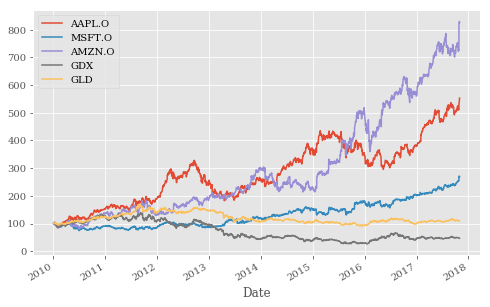

In [37]:
(data / data.ix[0] * 100).plot(figsize=(8, 5), grid=True)
# tag: portfolio_1
# title: Stock prices over time
# size: 90

In [38]:
rets = np.log(data / data.shift(1))

In [39]:
rets.mean() * 252

AAPL.O    0.218633
MSFT.O    0.126401
AMZN.O    0.269869
GDX      -0.096212
GLD       0.012069
dtype: float64

In [40]:
rets.cov() * 252

,AAPL.O,MSFT.O,AMZN.O,GDX,GLD
AAPL.O,0.064899,0.022504,0.026932,0.014669,0.001510
MSFT.O,0.022504,0.050234,0.029146,0.010995,-0.000426
AMZN.O,0.026932,0.029146,0.097792,0.009917,-0.001584
GDX,0.014669,0.010995,0.009917,0.150716,0.048760
GLD,0.001510,-0.000426,-0.001584,0.048760,0.027666


### The Basic Theory

In [41]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [42]:
weights

array([ 0.0346395 ,  0.02726489,  0.2868883 ,  0.10396806,  0.54723926])

In [43]:
np.sum(rets.mean() * weights) * 252
  # expected portfolio return

0.085043701982308262

In [44]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))
  # expected portfolio variance

0.024966990290115794

In [45]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
  # expected portfolio standard deviation/volatility

0.15800946266004387

In [46]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

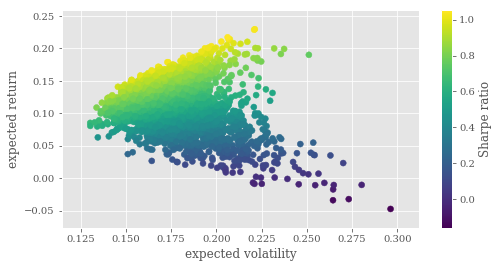

In [47]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# tag: portfolio_2
# title: Expected return and volatility for different/random portfolio weights
# size: 90

### Portfolio Optimizations

In [48]:
def statistics(weights):
    ''' Return portfolio statistics.
    
    Parameters
    ==========
    weights : array-like
        weights for different securities in portfolio
    
    Returns
    =======
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

In [49]:
import scipy.optimize as sco

In [50]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [51]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [52]:
bnds = tuple((0, 1) for x in range(noa))

In [53]:
noa * [1. / noa,]

[0.2, 0.2, 0.2, 0.2, 0.2]

In [54]:
%%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

CPU times: user 108 ms, sys: 2.52 ms, total: 111 ms
Wall time: 110 ms


In [55]:
opts

     fun: -1.0556617020534316
     jac: array([  4.79519367e-05,  -6.97374344e-05,   5.30779362e-05,
         8.51281390e-01,  -4.90382314e-04])
 message: 'Optimization terminated successfully.'
    nfev: 49
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([ 0.47403303,  0.05035899,  0.39381481,  0.        ,  0.08179317])

In [56]:
opts['x'].round(3)

array([ 0.474,  0.05 ,  0.394,  0.   ,  0.082])

In [57]:
statistics(opts['x']).round(3)

array([ 0.217,  0.206,  1.056])

In [58]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

In [59]:
optv = sco.minimize(min_func_variance, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [60]:
optv

     fun: 0.015978878561911988
     jac: array([ 0.03154033,  0.03221243,  0.03183019,  0.06642421,  0.03195841])
 message: 'Optimization terminated successfully.'
    nfev: 70
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([  1.20347102e-01,   2.30912816e-01,   7.01553015e-02,
         2.68272275e-17,   5.78584780e-01])

In [61]:
optv['x'].round(3)

array([ 0.12 ,  0.231,  0.07 ,  0.   ,  0.579])

In [62]:
statistics(optv['x']).round(3)

array([ 0.081,  0.126,  0.644])

### Efficient Frontier

In [63]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

In [64]:
def min_func_port(weights):
    return statistics(weights)[1]

In [65]:
%%time
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 4.87 s, sys: 25.5 ms, total: 4.89 s
Wall time: 4.93 s


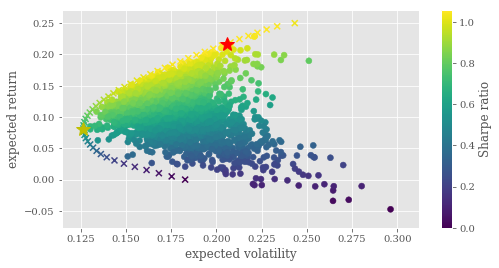

In [66]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=prets / pvols, marker='o')
            # random portfolio composition
plt.scatter(tvols, trets,
            c=trets / tvols, marker='x')
            # efficient frontier
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=15.0)
            # portfolio with highest Sharpe ratio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
         'y*', markersize=15.0)
            # minimum variance portfolio
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# tag: portfolio_3
# title: Minimum risk portfolios for given return level (crosses)
# size: 90

### Capital Market Line

In [67]:
import scipy.interpolate as sci

In [68]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [69]:
tck = sci.splrep(evols, erets)

In [70]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

In [71]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [72]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

In [73]:
opt

array([ 0.01      ,  1.0090905 ,  0.22552992])

In [74]:
np.round(equations(opt), 6)

array([ 0., -0., -0.])

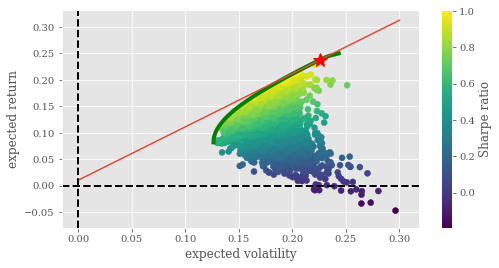

In [75]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=(prets - 0.01) / pvols, marker='o')
            # random portfolio composition
plt.plot(evols, erets, 'g', lw=4.0)
            # efficient frontier
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)
            # capital market line
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# tag: portfolio_4
# title: Capital market line and tangency portfolio (star) for risk-free rate of 1%
# size: 90

In [76]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [77]:
res['x'].round(3)

array([ 0.525,  0.025,  0.443,  0.   ,  0.007])

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>

**Python Training** |
<a href="http://training.tpq.io" target="_blank">Python for Finance University Certificate</a>